In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

# Membuat sample dataset dengan missing values
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', None],
    'Age': [24, 30, None, 22, 35],
    'Salary': [48000, None, 57000, None, 60000]
}
df = pd.DataFrame(data)

print('Data awal:')
print(df)
print('\nInformasi missing values:')
print(df.isnull().sum())

Data awal:
      Name   Age   Salary
0    Alice  24.0  48000.0
1      Bob  30.0      NaN
2  Charlie   NaN  57000.0
3    David  22.0      NaN
4     None  35.0  60000.0

Informasi missing values:
Name      1
Age       1
Salary    2
dtype: int64


In [5]:
# Mengisi missing values pada kolom Age dengan nilai rata-rata
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Mengisi missing values pada kolom Salary dengan nilai median
df['Salary'].fillna(df['Salary'].median(), inplace=True)

# Menghapus baris dengan missing values pada kolom Name
df.dropna(subset=['Name'], inplace=True)

print('Setelah cleaning:')
print(df)

Setelah cleaning:
      Name    Age   Salary
0    Alice  24.00  48000.0
1      Bob  30.00  57000.0
2  Charlie  27.75  57000.0
3    David  22.00  57000.0


/tmp/ipykernel_6141/2349569513.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipykernel_6141/2349569513.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [6]:
# Sample dataset dengan nilai kategorikal yang tidak konsisten
data = {
    'Product': ['Laptop', 'Laptop', 'Desktop', 'Tablet', 'Tablet'],
    'Category': ['Electronics', 'electronics', 'Electronics', 'Gadgets', 'gadgets']
}
df = pd.DataFrame(data)

print('Data sebelum standarisasi:')
print(df)
print('\nUnique values di kolom Category:')
print(df['Category'].unique())

Data sebelum standarisasi:
   Product     Category
0   Laptop  Electronics
1   Laptop  electronics
2  Desktop  Electronics
3   Tablet      Gadgets
4   Tablet      gadgets

Unique values di kolom Category:
['Electronics' 'electronics' 'Gadgets' 'gadgets']


In [7]:
# Standarisasi nilai kategori dengan capitalize
df['Category'] = df['Category'].str.capitalize()

print('\nData setelah standarisasi:')
print(df)
print('\nUnique values setelah standarisasi:')
print(df['Category'].unique())


Data setelah standarisasi:
   Product     Category
0   Laptop  Electronics
1   Laptop  Electronics
2  Desktop  Electronics
3   Tablet      Gadgets
4   Tablet      Gadgets

Unique values setelah standarisasi:
['Electronics' 'Gadgets']


In [11]:
import pandas as pd
import os

# Ganti 'username' dengan username Ubuntu Anda
username = os.getenv('USER')  # Otomatis mengambil username
file_path = f'/home/{username}/Downloads/Titanic-Dataset.csv'

# Cek apakah file ada
if os.path.exists(file_path):
    print(f"File ditemukan: {file_path}")
    df = pd.read_csv(file_path)
    print("Dataset berhasil di-load!")
else:
    print(f"File tidak ditemukan di: {file_path}")
    print("Periksa nama file dan lokasi folder!")

File ditemukan: /home/akmal/Downloads/Titanic-Dataset.csv
Dataset berhasil di-load!


In [16]:
# Load dataset Titanic
# Pastikan file Titanic-Dataset.csv ada di direktori yang sama
df_titanic = pd.read_csv('Titanic-Dataset.csv')

# Menampilkan informasi dasar dataset
print('Informasi Dataset:')
print(df_titanic.info())
print('\n5 Baris Pertama:')
print(df_titanic.head())
print('\nStatistik Deskriptif:')
print(df_titanic.describe())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

5 Baris Pertama:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5        


Jumlah Missing Values per Kolom:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Persentase Missing Values:
Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64


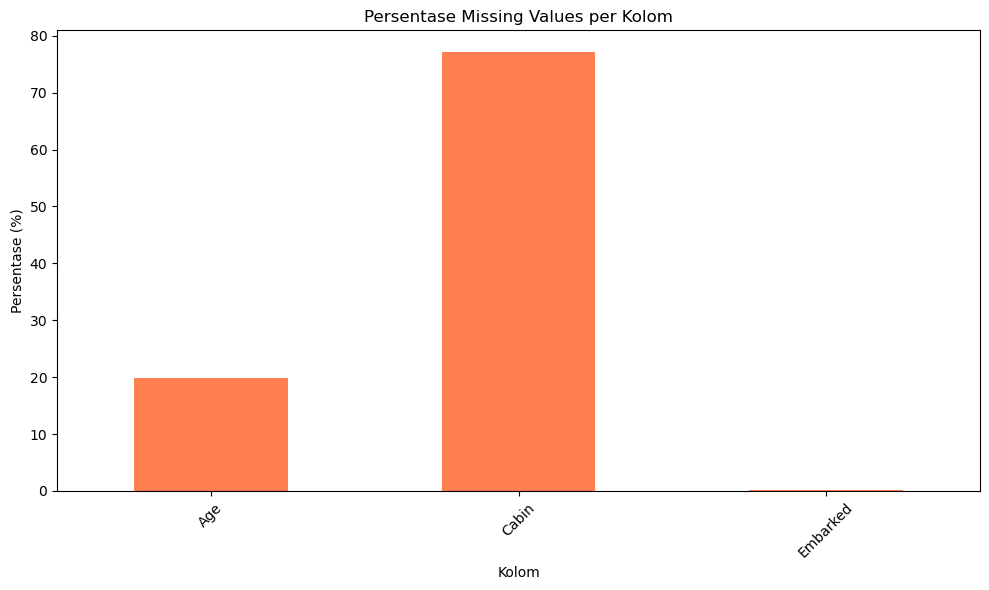

In [17]:
# Menghitung missing values
print('\nJumlah Missing Values per Kolom:')
print(df_titanic.isnull().sum())

# Persentase missing values
print('\nPersentase Missing Values:')
missing_percentage = (df_titanic.isnull().sum() / len(df_titanic)) * 100
print(missing_percentage[missing_percentage > 0])

# Visualisasi missing values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
missing_percentage[missing_percentage > 0].plot(kind='bar', color='coral')
plt.title('Persentase Missing Values per Kolom')
plt.ylabel('Persentase (%)')
plt.xlabel('Kolom')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# Membuat copy dataset untuk cleaning
df_clean = df_titanic.copy()

# 1. Kolom Age: Isi dengan median berdasarkan Pclass
df_clean['Age'] = df_clean.groupby('Pclass')['Age'].transform(
    lambda x: x.fillna(x.median())
)

# 2. Kolom Embarked: Isi dengan modus (nilai terbanyak)
df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0], inplace=True)

# 3. Kolom Cabin: Memiliki terlalu banyak missing values
# Buat kolom baru untuk menandai apakah Cabin ada atau tidak
df_clean['Has_Cabin'] = df_clean['Cabin'].notna().astype(int)
df_clean.drop('Cabin', axis=1, inplace=True)

# 4. Kolom Fare: Isi dengan median
df_clean['Fare'].fillna(df_clean['Fare'].median(), inplace=True)

# Verifikasi tidak ada missing values
print('\nMissing Values Setelah Cleaning:')
print(df_clean.isnull().sum())


Missing Values Setelah Cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64


/tmp/ipykernel_6141/2897602236.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0], inplace=True)
/tmp/ipykernel_6141/2897602236.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

In [20]:
# Normalisasi kolom Fare menggunakan Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_clean['Fare_Normalized'] = scaler.fit_transform(df_clean[['Fare']])

print('\nPerbandingan Fare Original vs Normalized:')
print(df_clean[['Fare', 'Fare_Normalized']].head(10))

# Normalisasi kolom Age
df_clean['Age_Normalized'] = scaler.fit_transform(df_clean[['Age']])

# Membuat kategori Age
df_clean['Age_Category'] = pd.cut(df_clean['Age'], 
                                    bins=[0, 12, 18, 35, 60, 100],
                                    labels=['Anak', 'Remaja', 'Dewasa', 'Setengah Baya', 'Lansia'])

print('\nDistribusi Age Category:')
print(df_clean['Age_Category'].value_counts())


Perbandingan Fare Original vs Normalized:
      Fare  Fare_Normalized
0   7.2500         0.014151
1  71.2833         0.139136
2   7.9250         0.015469
3  53.1000         0.103644
4   8.0500         0.015713
5   8.4583         0.016510
6  51.8625         0.101229
7  21.0750         0.041136
8  11.1333         0.021731
9  30.0708         0.058694

Distribusi Age Category:
Age_Category
Dewasa           505
Setengah Baya    225
Remaja            70
Anak              69
Lansia            22
Name: count, dtype: int64


In [21]:
# Standarisasi kolom Sex
df_clean['Sex'] = df_clean['Sex'].str.capitalize()

# Standarisasi kolom Embarked
embarked_mapping = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}
df_clean['Embarked_Full'] = df_clean['Embarked'].map(embarked_mapping)

# Encode categorical variables
df_clean['Sex_Encoded'] = df_clean['Sex'].map({'Male': 0, 'Female': 1})
df_clean['Embarked_Encoded'] = df_clean['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

print('\nData Setelah Standarisasi:')
print(df_clean[['Sex', 'Sex_Encoded', 'Embarked', 'Embarked_Full', 'Embarked_Encoded']].head())


Data Setelah Standarisasi:
      Sex  Sex_Encoded Embarked Embarked_Full  Embarked_Encoded
0    Male            0        S   Southampton                 2
1  Female            1        C     Cherbourg                 0
2  Female            1        S   Southampton                 2
3  Female            1        S   Southampton                 2
4    Male            0        S   Southampton                 2


In [22]:
# Cek duplikasi
print('\nJumlah Baris Duplikat:')
print(df_clean.duplicated().sum())

# Hapus duplikasi jika ada
df_clean.drop_duplicates(inplace=True)

# Filtering: Ambil hanya penumpang dengan usia 18-60 tahun
df_filtered = df_clean[(df_clean['Age'] >= 18) & (df_clean['Age'] <= 60)]
print(f'\nJumlah data setelah filtering usia: {len(df_filtered)} dari {len(df_clean)}')

# Filtering: Ambil penumpang kelas 1 dan 2
df_filtered_class = df_clean[df_clean['Pclass'].isin([1, 2])]
print(f'Jumlah penumpang kelas 1 dan 2: {len(df_filtered_class)}')


Jumlah Baris Duplikat:
0

Jumlah data setelah filtering usia: 756 dari 891
Jumlah penumpang kelas 1 dan 2: 400



Jumlah Outlier pada Fare: 116
Batas Bawah: -26.72, Batas Atas: 65.63


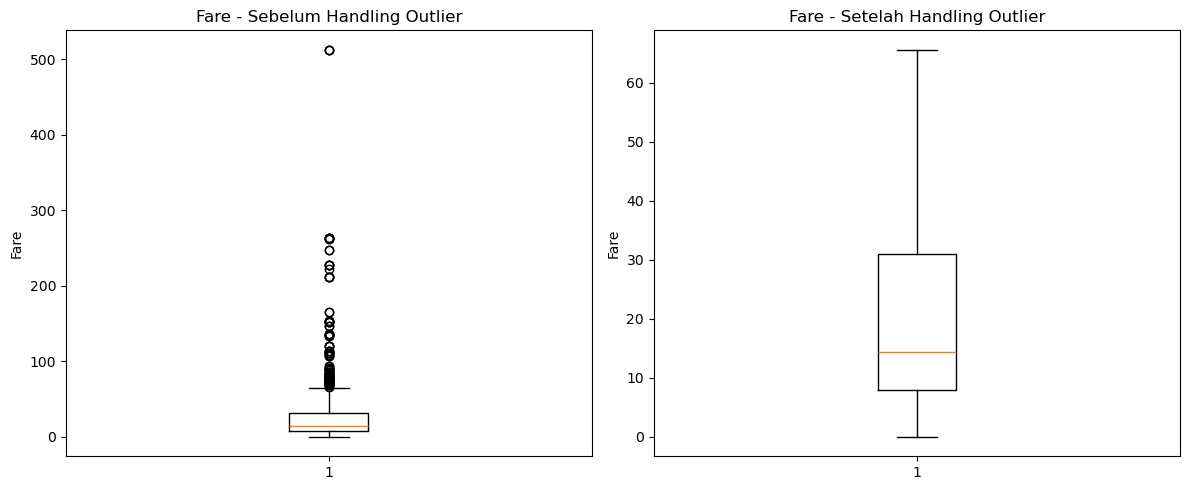

In [23]:
# Deteksi outlier menggunakan IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Deteksi outlier pada kolom Fare
outliers_fare, lower_fare, upper_fare = detect_outliers_iqr(df_clean, 'Fare')
print(f'\nJumlah Outlier pada Fare: {len(outliers_fare)}')
print(f'Batas Bawah: {lower_fare:.2f}, Batas Atas: {upper_fare:.2f}')

# Visualisasi outlier menggunakan boxplot
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot sebelum handling outlier
axes[0].boxplot(df_clean['Fare'].dropna())
axes[0].set_title('Fare - Sebelum Handling Outlier')
axes[0].set_ylabel('Fare')

# Handling outlier: Winsorization (cap values)
df_clean['Fare_Capped'] = df_clean['Fare'].clip(lower=lower_fare, upper=upper_fare)

# Boxplot setelah handling outlier
axes[1].boxplot(df_clean['Fare_Capped'].dropna())
axes[1].set_title('Fare - Setelah Handling Outlier')
axes[1].set_ylabel('Fare')

plt.tight_layout()
plt.show()

In [24]:
# Membuat feature baru
# 1. Family Size
df_clean['Family_Size'] = df_clean['SibSp'] + df_clean['Parch'] + 1

# 2. Is Alone
df_clean['Is_Alone'] = (df_clean['Family_Size'] == 1).astype(int)

# 3. Title dari Name
df_clean['Title'] = df_clean['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Standarisasi title yang jarang muncul
title_mapping = {
    'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master',
    'Dr': 'Rare', 'Rev': 'Rare', 'Col': 'Rare', 'Major': 'Rare',
    'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs', 'Countess': 'Rare',
    'Lady': 'Rare', 'Jonkheer': 'Rare', 'Sir': 'Rare', 'Capt': 'Rare',
    'Don': 'Rare', 'Dona': 'Rare'
}
df_clean['Title'] = df_clean['Title'].map(title_mapping)

print('\nFeature Engineering Results:')
print(df_clean[['Name', 'Title', 'Family_Size', 'Is_Alone']].head())
print('\nDistribusi Title:')
print(df_clean['Title'].value_counts())


Feature Engineering Results:
                                                Name Title  Family_Size  \
0                            Braund, Mr. Owen Harris    Mr            2   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs            2   
2                             Heikkinen, Miss. Laina  Miss            1   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs            2   
4                           Allen, Mr. William Henry    Mr            1   

   Is_Alone  
0         0  
1         0  
2         1  
3         0  
4         1  

Distribusi Title:
Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64


In [25]:
# Simpan data yang sudah dibersihkan
df_clean.to_csv('Titanic_Cleaned.csv', index=False)
print('\nData berhasil disimpan ke Titanic_Cleaned.csv')

# Summary akhir
print('\n=== SUMMARY DATA CLEANING ===')
print(f'Jumlah baris awal: {len(df_titanic)}')
print(f'Jumlah baris akhir: {len(df_clean)}')
print(f'Jumlah kolom awal: {len(df_titanic.columns)}')
print(f'Jumlah kolom akhir: {len(df_clean.columns)}')
print(f'\nKolom-kolom baru yang ditambahkan:')
new_columns = set(df_clean.columns) - set(df_titanic.columns)
for col in new_columns:
    print(f'- {col}')


Data berhasil disimpan ke Titanic_Cleaned.csv

=== SUMMARY DATA CLEANING ===
Jumlah baris awal: 891
Jumlah baris akhir: 891
Jumlah kolom awal: 12
Jumlah kolom akhir: 22

Kolom-kolom baru yang ditambahkan:
- Embarked_Encoded
- Sex_Encoded
- Title
- Family_Size
- Has_Cabin
- Fare_Capped
- Age_Normalized
- Fare_Normalized
- Age_Category
- Is_Alone
- Embarked_Full
